In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
data_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(data_path)
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [ ]:
#Headline Analysis

In [6]:
# Descriptive statistics for headline length
headline_stats = df['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


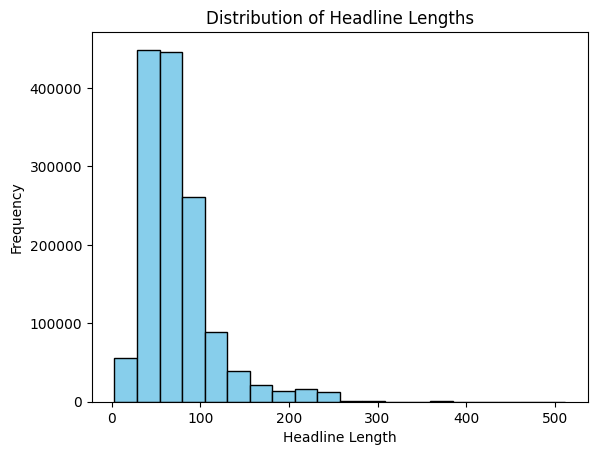

In [4]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Plot headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()